<h2><a href="https://leetcode.com/problems/word-search">79. Word Search</a></h2><h3>Medium</h3><hr><p>Given an <code>m x n</code> grid of characters <code>board</code> and a string <code>word</code>, return <code>true</code> <em>if</em> <code>word</code> <em>exists in the grid</em>.</p>

<p>The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/11/04/word2.jpg" style="width: 322px; height: 242px;" />
<pre>
<strong>Input:</strong> board = [[&quot;A&quot;,&quot;B&quot;,&quot;C&quot;,&quot;E&quot;],[&quot;S&quot;,&quot;F&quot;,&quot;C&quot;,&quot;S&quot;],[&quot;A&quot;,&quot;D&quot;,&quot;E&quot;,&quot;E&quot;]], word = &quot;ABCCED&quot;
<strong>Output:</strong> true
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/11/04/word-1.jpg" style="width: 322px; height: 242px;" />
<pre>
<strong>Input:</strong> board = [[&quot;A&quot;,&quot;B&quot;,&quot;C&quot;,&quot;E&quot;],[&quot;S&quot;,&quot;F&quot;,&quot;C&quot;,&quot;S&quot;],[&quot;A&quot;,&quot;D&quot;,&quot;E&quot;,&quot;E&quot;]], word = &quot;SEE&quot;
<strong>Output:</strong> true
</pre>

<p><strong class="example">Example 3:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/10/15/word3.jpg" style="width: 322px; height: 242px;" />
<pre>
<strong>Input:</strong> board = [[&quot;A&quot;,&quot;B&quot;,&quot;C&quot;,&quot;E&quot;],[&quot;S&quot;,&quot;F&quot;,&quot;C&quot;,&quot;S&quot;],[&quot;A&quot;,&quot;D&quot;,&quot;E&quot;,&quot;E&quot;]], word = &quot;ABCB&quot;
<strong>Output:</strong> false
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == board.length</code></li>
	<li><code>n = board[i].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 6</code></li>
	<li><code>1 &lt;= word.length &lt;= 15</code></li>
	<li><code>board</code> and <code>word</code> consists of only lowercase and uppercase English letters.</li>
</ul>

<p>&nbsp;</p>
<p><strong>Follow up:</strong> Could you use search pruning to make your solution faster with a larger <code>board</code>?</p>


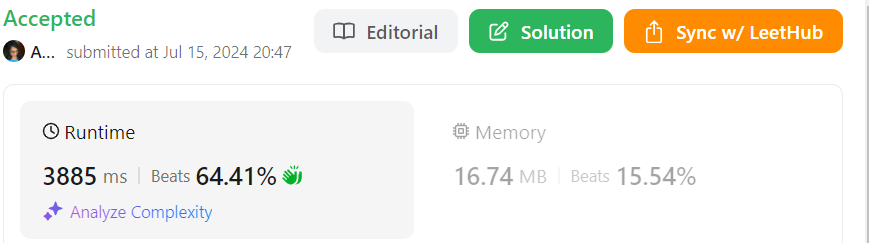

In [7]:
from typing import List

class Solution:
    def __init__(self):
        self.directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    def exist(self, board: List[List[str]], word: str) -> bool:
        rows, cols = len(board), len(board[0])
        visit = [[0]* cols for _ in range(rows)]
        
        trie = Trie()
        trie.insert(word)
        
        node = trie.root

        for i in range(rows):
            for j in range(cols):
                if self.word_found(board, word, i, j, node, visit):
                    return True 

        return False

    def word_found(self, board, word, x, y,  trie, visit):
        char = board[x][y]
        print(f" Eentering char: {char}")
        if char not in trie.children:
            return False

        trie = trie.children[char]
        if trie.eow:
            return True
        
        visit[x][y] = 1    #  Entering char marked 
        for dx, dy in self.directions:
            if (0 <= x + dx < len(board)) and (0 <= y + dy < len(board[0])) and visit[x + dx][y + dy] == 0:
                print(f"traversing char : {board[x+dx][y+dy]}")
                if self.word_found(board, word, x + dx, y + dy,  trie, visit):
                    print(f"satisfying char : {board[x+dx][y+dy]}")
                    return True
                
        print("Exiting.....")
        visit[x][y] = 0    # Unmark Entering char


class TrieNode:
    def __init__(self):
        self.children = {}
        self.eow = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        cur = self.root
        for char in word:
            if char not in cur.children:
                cur.children[char] = TrieNode()
            cur = cur.children[char]

        cur.eow = True 

In [8]:
board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]]
word = "ABCCED"
sol = Solution()
sol.exist(board ,word )

 root char: A
traversing char : S
 root char: S
traversing char : B
 root char: B
traversing char : F
 root char: F
traversing char : C
 root char: C
traversing char : C
 root char: C
traversing char : E
 root char: E
traversing char : E
 root char: E
traversing char : D
 root char: D
satisfying char : D
satisfying char : E
satisfying char : C
satisfying char : C
satisfying char : B


True